In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
d=pd.read_csv('cancer.csv')
d.head()

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,1000025,5,1,1,1,2,1,3,1,1,2,NaN,NaN,NaN
1,1002945,5,4,4,5,7,10,3,2,1,2,NaN,NaN,NaN
2,1015425,3,1,1,1,2,2,3,1,1,2,NaN,NaN,NaN
3,1016277,6,8,8,1,3,4,3,7,1,2,NaN,NaN,NaN
4,1017023,4,1,1,3,2,1,3,1,1,2,NaN,NaN,NaN


In [3]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 14 columns):
ID                             699 non-null int64
ClumpThickness                 699 non-null int64
Cell Size                      699 non-null int64
Cell Shape                     699 non-null int64
Marginal Adhesion              699 non-null int64
Single Epithelial Cell Size    699 non-null int64
Bare Nuclei                    699 non-null object
Normal Nucleoli                699 non-null int64
Bland Chromatin                699 non-null int64
Mitoses                        699 non-null int64
Class                          699 non-null int64
Unnamed: 11                    0 non-null float64
Unnamed: 12                    0 non-null float64
Unnamed: 13                    0 non-null float64
dtypes: float64(3), int64(10), object(1)
memory usage: 76.6+ KB


In [4]:
d['Bare Nuclei']=d['Bare Nuclei'].replace({'?':0})

In [5]:
d['Bare Nuclei']=d['Bare Nuclei'].astype('int64')

In [6]:
d['Bare Nuclei']=d['Bare Nuclei'].replace({0:d['Bare Nuclei'].median()})

In [7]:
d1=d.drop(['ID','Unnamed: 11','Unnamed: 12','Unnamed: 13'],axis=1)

In [8]:
d1['Class']=d1['Class'].replace({2:0,4:1})

In [9]:
x=d1.drop(['Class'],axis=1)
y=d1['Class']

In [10]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy.stats import zscore

In [11]:
xstd=StandardScaler().fit_transform(x)

In [12]:
cov_matrix = np.cov(xstd.T)
print('Covariance Matrix \n', cov_matrix)

Covariance Matrix 
 [[1.00143266 0.64583645 0.65552689 0.48705303 0.52256381 0.5908535
  0.5592282  0.53660222 0.35053534]
 [0.64583645 1.00143266 0.90818117 0.70659267 0.75287621 0.68765657
  0.75680368 0.72390044 0.4593503 ]
 [0.65552689 0.90818117 1.00143266 0.68405782 0.72069948 0.70848734
  0.73700282 0.72047704 0.43953974]
 [0.48705303 0.70659267 0.68405782 1.00143266 0.60045809 0.66792658
  0.66767051 0.60421681 0.41823111]
 [0.52256381 0.75287621 0.72069948 0.60045809 1.00143266 0.5845377
  0.61698451 0.62978166 0.47978787]
 [0.5908535  0.68765657 0.70848734 0.66792658 0.5845377  1.00143266
  0.67518063 0.5756016  0.34288766]
 [0.5592282  0.75680368 0.73700282 0.66767051 0.61698451 0.67518063
  1.00143266 0.66683179 0.34466258]
 [0.53660222 0.72390044 0.72047704 0.60421681 0.62978166 0.5756016
  0.66683179 1.00143266 0.42894941]
 [0.35053534 0.4593503  0.43953974 0.41823111 0.47978787 0.34288766
  0.34466258 0.42894941 1.00143266]]


In [13]:
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)
print('Eigen Vectors \n', eig_vecs)
print('\n Eigen Values \n', eig_vals)

Eigen Vectors 
 [[-0.30280515  0.14602888 -0.86221719  0.0014072  -0.08821658  0.07192848
   0.24081701  0.26946934 -0.00131277]
 [-0.38119012  0.04956364  0.01909154  0.73568065  0.2026394  -0.13735749
  -0.44088652  0.1000979   0.21521315]
 [-0.37757351  0.08526953 -0.0345843  -0.66537497  0.17515522 -0.10469081
  -0.58600968  0.03200191  0.14204379]
 [-0.33282286  0.04471887  0.42144828 -0.04671812 -0.4703171   0.03462797
   0.11866965  0.68083355 -0.0861038 ]
 [-0.33639134 -0.16403795  0.11010437 -0.06786939  0.37332927 -0.68258246
   0.45057208 -0.03559797 -0.18337725]
 [-0.33349748  0.2477099  -0.00367104  0.07339423 -0.5431767  -0.1275059
  -0.10299896 -0.57486596 -0.41187463]
 [-0.3459564   0.22994199  0.19744944 -0.05881119 -0.00698988  0.25519148
   0.40975993 -0.31459721  0.67301535]
 [-0.33584019 -0.02502678  0.13164974  0.01889835  0.45537199  0.63180293
   0.08247514 -0.03841564 -0.50406321]
 [-0.22981766 -0.90839421 -0.09459348 -0.0075291  -0.23968608  0.1316273
  -0.042

In [14]:
tot = sum(eig_vals)
var_exp = [( i /tot ) * 100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance Explained", cum_var_exp)

Cumulative Variance Explained [ 65.4457038   74.05429355  80.04128903  85.21615907  89.44363313
  92.81719904  96.10243391  99.01309194 100.        ]


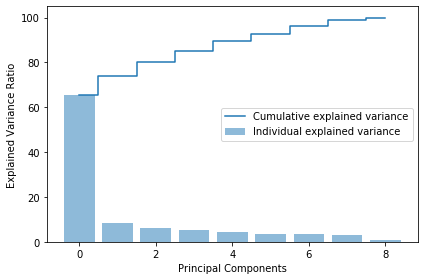

In [15]:
plt.figure(figsize=(6 , 4))
plt.bar(range(9), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(9), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

In [16]:
from sklearn.metrics import confusion_matrix
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [17]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [18]:
from sklearn import tree
model=tree.DecisionTreeClassifier()
model.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [19]:
y_pred_DT = model.predict(X_test)

In [20]:
cm_DT= confusion_matrix(y_test, y_pred_DT)
cm_DT

array([[83,  2],
       [ 4, 51]], dtype=int64)

In [21]:
classification=classification_report(y_test,y_pred_DT)
print(classification)
ac = accuracy_score(y_test, y_pred_DT)
print("Accuracy Score:", ac)

              precision    recall  f1-score   support

           0       0.95      0.98      0.97        85
           1       0.96      0.93      0.94        55

    accuracy                           0.96       140
   macro avg       0.96      0.95      0.95       140
weighted avg       0.96      0.96      0.96       140

Accuracy Score: 0.9571428571428572


In [22]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [23]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [24]:
from sklearn.decomposition import PCA
pca = PCA()
X_train_2 = pca.fit_transform(X_train)
X_test_2 = pca.transform(X_test)

In [25]:
explained_variance = pca.explained_variance_ratio_  
explained_variance

array([0.65564186, 0.08645996, 0.05956477, 0.05215202, 0.04012652,
       0.03636135, 0.03163519, 0.02845705, 0.00960127])

In [26]:
from sklearn import tree
model2=tree.DecisionTreeClassifier()
model2.fit(X_train_2,y_train)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [27]:
y_pred_DT_2 = model2.predict(X_test_2)

In [28]:
from sklearn.metrics import confusion_matrix
cm_PCA= confusion_matrix(y_test, y_pred_DT_2)

In [29]:
ac_PCA = accuracy_score(y_test, y_pred_DT_2)
print("Accuracy Score:", ac_PCA)

classification_2=classification_report(y_test,y_pred_DT_2)
print(classification_2)

Accuracy Score: 0.9642857142857143
              precision    recall  f1-score   support

           0       0.98      0.96      0.97        85
           1       0.95      0.96      0.95        55

    accuracy                           0.96       140
   macro avg       0.96      0.96      0.96       140
weighted avg       0.96      0.96      0.96       140



In [30]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [31]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [32]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
X_train_2 = pca.fit_transform(X_train)
X_test_2 = pca.transform(X_test)

In [33]:
explained_variance = pca.explained_variance_ratio_  
explained_variance

array([0.65564186, 0.08645996, 0.05956477])

In [34]:
from sklearn import tree
model2=tree.DecisionTreeClassifier()
model2.fit(X_train_2,y_train)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [35]:
y_pred_DT_2 = model2.predict(X_test_2)

In [36]:
from sklearn.metrics import confusion_matrix
cm_PCA= confusion_matrix(y_test, y_pred_DT_2)

In [37]:
ac_PCA = accuracy_score(y_test, y_pred_DT_2)
print("Accuracy Score:", ac_PCA)

classification_2=classification_report(y_test,y_pred_DT_2)
print(classification_2)

Accuracy Score: 0.9714285714285714
              precision    recall  f1-score   support

           0       0.99      0.96      0.98        85
           1       0.95      0.98      0.96        55

    accuracy                           0.97       140
   macro avg       0.97      0.97      0.97       140
weighted avg       0.97      0.97      0.97       140



In [38]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [39]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [40]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_train_2 = pca.fit_transform(X_train)
X_test_2 = pca.transform(X_test)

In [41]:
explained_variance = pca.explained_variance_ratio_  
explained_variance

array([0.65564186, 0.08645996])

In [42]:
from sklearn import tree
model2=tree.DecisionTreeClassifier()
model2.fit(X_train_2,y_train)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [43]:
y_pred_DT_2 = model2.predict(X_test_2)

In [44]:
from sklearn.metrics import confusion_matrix
cm_PCA= confusion_matrix(y_test, y_pred_DT_2)

In [45]:
ac_PCA = accuracy_score(y_test, y_pred_DT_2)
print("Accuracy Score:", ac_PCA)

classification_2=classification_report(y_test,y_pred_DT_2)
print(classification_2)

Accuracy Score: 0.9714285714285714
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        85
           1       0.98      0.95      0.96        55

    accuracy                           0.97       140
   macro avg       0.97      0.97      0.97       140
weighted avg       0.97      0.97      0.97       140



## Inference:
Accuracy score of the PCA model with n_components=3, showing the better score than PCA with (n_components=all and 3 components).